## Reparación de errores topológicos

En este notebook se analiza un error topológico que puede surgir cuando se intentan intersectar shapes y cómo solucionarlo.

In [10]:
import shapefile
from scripts import geo_utils
from scripts.calculate_weights import calculate_intersect_weights
from scripts.path_finders import get_weights_path

## Ejemplo: errores entre shapes de fracciones y buffers de subtes de 500 metros

In [21]:
shp_path = "shp/divisiones/fracciones_caba_censo_2010/fracciones_censo_2010"
buffer_dir = "shp/transporte/buffers/estaciones_de_subte-buffer500"
division_dir = "shp/divisiones/fracciones_caba_censo_2010"
weights_path = get_weights_path(buffer_dir, "fracciones")

In [15]:
sf = shapefile.Reader(shp_path)

In [17]:
intersections = calculate_intersect_weights(division_dir, buffer_dir, weights_path)

In [19]:
shapely_shps = geo_utils.get_shapely_shapes(sf)

Este shape está topológicamente mal hecho


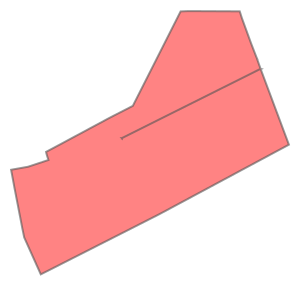

In [20]:
print "Este shape está topológicamente mal hecho" 
shapely_shps[268]

Ahora está arreglado


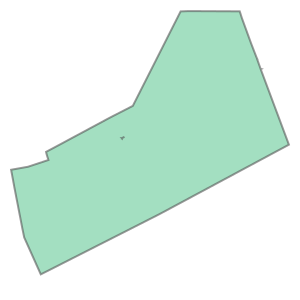

In [22]:
print "Ahora está arreglado" 
shapely_shps[268].buffer(0)

La aplicación de un buffer con distancia 0 puede arreglar varios errores topológicos comunes.

El shape del barrio de "Barracas" también está mal hecho

In [25]:
sf_barrios = shapefile.Reader("shp/divisiones/barrios_censo_2010/barrios_censo_2010")
shapely_shps = geo_utils.get_shapely_shapes(sf_barrios)

In [26]:
sf_barrios.records()[3]

['BARRACAS', 4, 4]

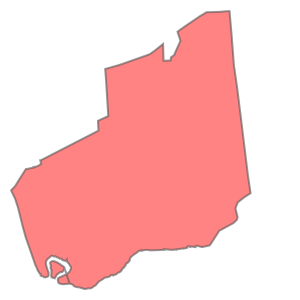

In [27]:
shapely_shps[3]

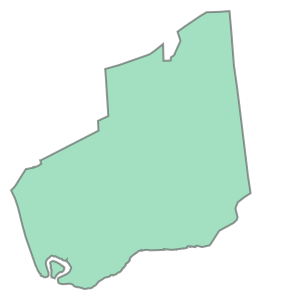

In [28]:
shapely_shps[3].buffer(0)